In [1]:
!pip install fastai --upgrade --quiet


     |████████████████████████████████| 189 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 


In [2]:
from fastai.vision.all import *


In [3]:
path = Path('data')
path.mkdir(exist_ok=True)

In [4]:
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/bear.txt
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/horse.txt
!wget -q https://raw.githubusercontent.com/Ankur-singh/image_scrapper/master/datasets/dog.txt

In [5]:
download_images('data/horse', Path('horse.txt'))
download_images('data/dog', Path('dog.txt'))
download_images('data/bear', Path('bear.txt'))

In [6]:
files = get_image_files(path)
len(files)

459

In [7]:
files

(#459) [Path('data/horse/00000130.jpg'),Path('data/horse/00000118.jpg'),Path('data/horse/00000103.png'),Path('data/horse/00000099.jpg'),Path('data/horse/00000145.png'),Path('data/horse/00000049.jpg'),Path('data/horse/00000154.jpg'),Path('data/horse/00000166.jpg'),Path('data/horse/00000061.jpg'),Path('data/horse/00000063.jpg')...]

In [8]:
failed = verify_images(files)
failed

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#10) [Path('data/horse/00000085.svg'),Path('data/horse/00000072.jpg'),Path('data/horse/00000119.jpg'),Path('data/dog/00000175.jpg'),Path('data/dog/00000055.jpg'),Path('data/dog/00000086.jpg'),Path('data/dog/00000068.jpg'),Path('data/dog/00000045.jpg'),Path('data/bear/00000025.jpg'),Path('data/bear/00000156.jpg')]

In [9]:
failed.map(Path.unlink) # delete corrupted files


(#10) [None,None,None,None,None,None,None,None,None,None]

In [10]:
files = get_image_files(path)
len(files)

449

In [11]:
#verify_images??


In [12]:
#path

In [13]:
#get_files??


In [14]:
files[0]

Path('data/horse/00000130.jpg')

In [15]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # x,y
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [16]:
dls = animals.dataloaders(path)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


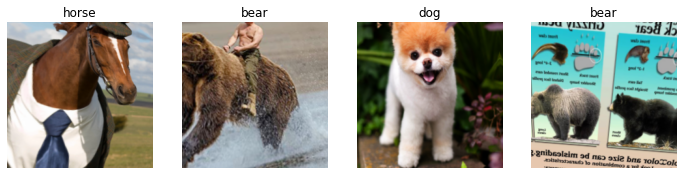

In [17]:
dls.train.show_batch(max_n=4, nrows=1)


In [18]:
learn = cnn_learner(dls, resnet18, metrics= [error_rate, accuracy])
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.429298,0.172559,0.078652,0.921348,00:29


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.248605,0.165228,0.067416,0.932584,00:28
1,0.210383,0.210570,0.112360,0.887640,00:29
2,0.173030,0.228554,0.112360,0.887640,00:28


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Ti

In [19]:
learn.predict(files[10])


('horse', TensorBase(2), TensorBase([1.7611e-04, 1.4721e-04, 9.9968e-01]))

In [20]:
learn.predict(files[11])


('horse', TensorBase(2), TensorBase([9.1701e-06, 1.6971e-05, 9.9997e-01]))

In [21]:
learn.predict(files[101])


('horse', TensorBase(2), TensorBase([3.6932e-04, 6.2288e-02, 9.3734e-01]))

In [22]:
learn.predict(files[310])


('bear', TensorBase(0), TensorBase([9.9982e-01, 2.0120e-05, 1.6314e-04]))

In [23]:
dls.vocab

['bear', 'dog', 'horse']

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


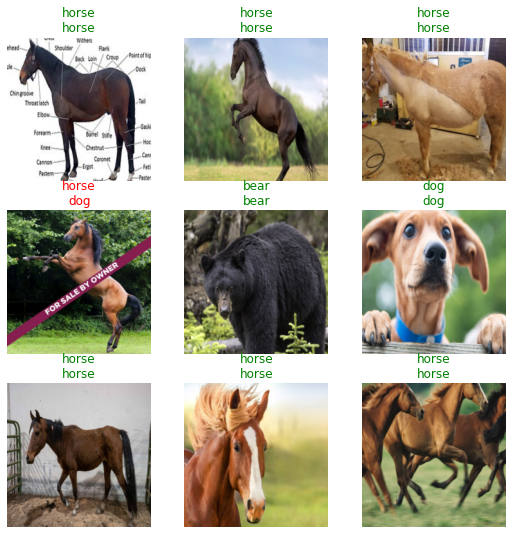

In [24]:
learn.show_results()


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


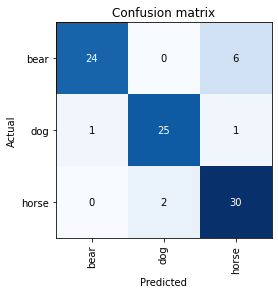

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

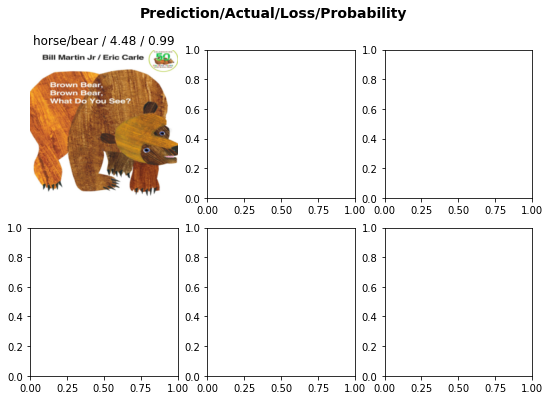

In [26]:
interp.plot_top_losses(6, nrows=2)


In [27]:
learn.export('export.pkl')


In [28]:
path = Path()

In [29]:
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [30]:
learn_inf=load_learner(path/'export.pkl')

In [31]:
learn_inf.dls.vocab

['bear', 'dog', 'horse']

In [32]:

!pip install jupyterlab-widgets
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!pip install -U ipywidgets
!jupyter nbextension install --py widgetsnbextension


Traceback (most recent call last):
  File "/usr/local/bin/jupyter", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 230, in main
    command = _jupyter_abspath(subcommand)
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/command.py", line 133, in _jupyter_abspath
    'Jupyter command `{}` not found.'.format(jupyter_subcommand)
Exception: Jupyter command `jupyter-labextension` not found.
Installing /usr/local/lib/python2.7/dist-packages/widgetsnbextension/static -> jupyter-js-widgets
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    


In [33]:
import ipywidgets as widgets


In [34]:
from ipywidgets import *


In [35]:
btn_upload = widgets.FileUpload()

In [36]:
btn_upload

FileUpload(value={}, description='Upload')

In [39]:
img = PILImage.create(btn_upload.data[-1])

In [40]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [41]:
pred,pred_idx,probs= learn_inf.predict(img)

In [42]:
lbl_pred = widgets.Label()
lbl_pred.value= f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: bear; Probability: 1.0000')

In [43]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [44]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs= learn_inf.predict(img)
  lbl_pred.value= f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)


In [45]:
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run,out_pl, lbl_pred])

In [46]:
#!pip install pyngrok


In [47]:
#!ngrok authtoken xxxxxxxxxxxxx
